# 1) 데이터 분석 준비

## 가) Colab 환경설정

In [2]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 요인분석 라이브러리 설치 -- 런타임 다시 시작 해야함
!pip install pingouin factor_analyzer

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## 나) 필수 패키지

In [2]:
import numpy as np
import pandas as pd
import missingno as msno

from patsy import demo_data, dmatrix
from pandas_profiling import ProfileReport

## 다) 시각화 패키지

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

## 라) 머신러닝 패키지

In [6]:
# 정규성 검정 - Shapiro-wilk, Q-Q Plot
from scipy.stats import shapiro, kstest
import statsmodels.api as sm

# 등분산성 검정
from scipy.stats import levene, bartlett, fligner

# T-검정
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

# 비모수 검정
from statsmodels.sandbox.stats.runs import Runs
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats import wilcoxon, ranksums, mannwhitneyu, kruskal

# 교차분석(카이제곱 & 피셔의 정확 검정)
from scipy.stats import chisquare, chi2_contingency, fisher_exact

# ANOMA 분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 다중비교 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 상관분석
from scipy import stats

# 결측치 대체
from sklearn.impute import SimpleImputer

# 표준화
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import minmax_scale

# 주성분 분석
from sklearn.decomposition import PCA

# 요인분석
import pingouin as pg
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

## 마) 분석 데이터 로드

In [7]:
mtcars = pd.read_csv('https://github.com/ksky1313/ADP/raw/main/data/mtcars.csv')
mtcars.drop(columns=mtcars.columns[0], inplace=True)
titanic = pd.read_csv('https://github.com/ksky1313/ADP/raw/main/data/titanic.csv', encoding='utf-8')
titanic.drop(columns=titanic.columns[0], inplace=True)

# 2) 데이터 셋 확인

## 가) 변수 확인

In [8]:
df = mtcars
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carname  32 non-null     object 
 1   mpg      32 non-null     float64
 2   cyl      32 non-null     int64  
 3   disp     32 non-null     float64
 4   hp       32 non-null     int64  
 5   drat     32 non-null     float64
 6   wt       32 non-null     float64
 7   qsec     32 non-null     float64
 8   vs       32 non-null     int64  
 9   am       32 non-null     int64  
 10  gear     32 non-null     int64  
 11  carb     32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


## 나) 변수간 관계 확인

### (1) 연속형 - 연속형 변수

In [10]:
# 상관 분석
df.corrwith(df.mpg).sort_values()

wt     -0.867659
cyl    -0.852162
disp   -0.847551
hp     -0.776168
carb   -0.550925
qsec    0.418684
gear    0.480285
am      0.599832
vs      0.664039
drat    0.681172
mpg     1.000000
dtype: float64

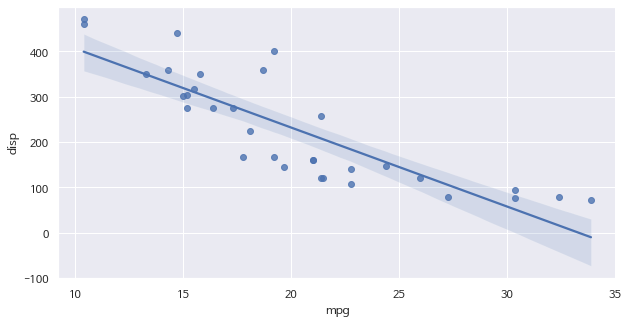

In [11]:
# 상관 관계 시각화
sns.regplot(
    data = df,
    x = 'mpg',
    y = 'disp'
);

### (2) 범주형 - 범주형 변수

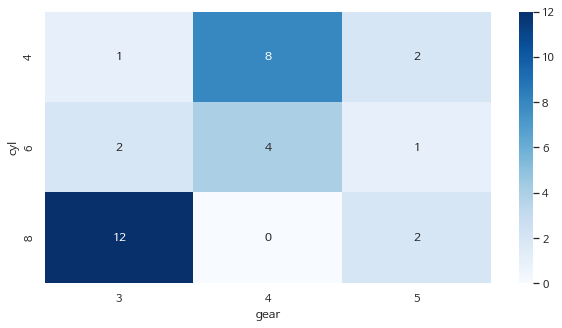

카이제곱검정, (H0) cyl과 gear는 서로 독립적이다: False
상관분석, cyl과 gear는 음(-0.5643104747017164)의 상관 관계이다.


In [12]:
# Contingency Table 생성 & 시각화
df_contingency = pd.crosstab(
    df['cyl'],
    df['gear']
    )

sns.heatmap(
    data = df_contingency,
    annot = True,
    cmap = 'Blues'
)
plt.show()

# 카이제곱 검정
chi, pvalue, dof, expected = chi2_contingency(df_contingency)
print('카이제곱검정, (H0) cyl과 gear는 서로 독립적이다: {}'.format(pvalue > 0.05))

# 스피어만 상관분석
stat, pvalue = stats.spearmanr(df.cyl, df.gear)
print('상관분석, cyl과 gear는 {}({})의 상관 관계이다.'.format('양' if stat > 0 else '음', stat))

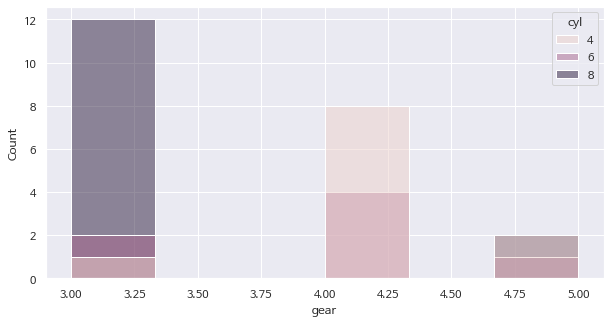

In [13]:
# 누적 막대 그래프 시각화
sns.histplot(
    data = df,
    x = 'gear',
    hue = 'cyl'
)

### (3) 범주형 - 연속형 변수

#### (가) 2개 범주 - T검정

In [14]:
# 등분산 검정
stat, pvalue = levene(
    df.query('am==0')['mpg'], 
    df.query('am==1')['mpg']
    )
print('등분산검정, (H0) 집단의 분산이 같다 : {}'.format(pvalue > 0.05))

# 독립표본 T검정 실시
stat, pvalue = ttest_ind(
    df.query('am==0')['mpg'], 
    df.query('am==1')['mpg'], 
    equal_var=(pvalue > 0.05)
    )
print('T검정, (H0) am에 따라 mpg 평균에 유의미한 차이가 없다. : {}'.format(pvalue > 0.05))

등분산검정, (H0) 집단의 분산이 같다 : False
T검정, (H0) am에 따라 mpg 평균에 유의미한 차이가 없다. : False


#### (나) 3개 범주 이상 - ANOVA

In [15]:
# 일원 ANOVA 검정
model = ols('mpg ~ C(cyl)', df).fit()
am = anova_lm(model, typ=3)

print('ANOVA, (H0) cyl에 따른 mpg의 평균은 같다. : {}'.format(am.iloc[1,3] > 0.05))

ANOVA, (H0) cyl에 따른 mpg의 평균은 같다. : False


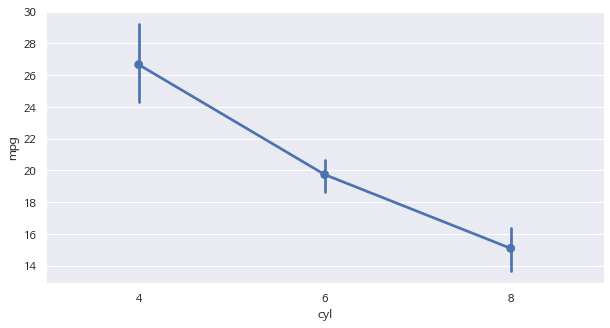

In [16]:
# 범주별 평균 시각화
sns.pointplot(
    data = df,
    x = 'cyl',
    y = 'mpg',
    cv = 100
);

# 3) 결측값 처리

## 가) 결측값 확인

In [17]:
df = titanic

# 결측치 확인
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

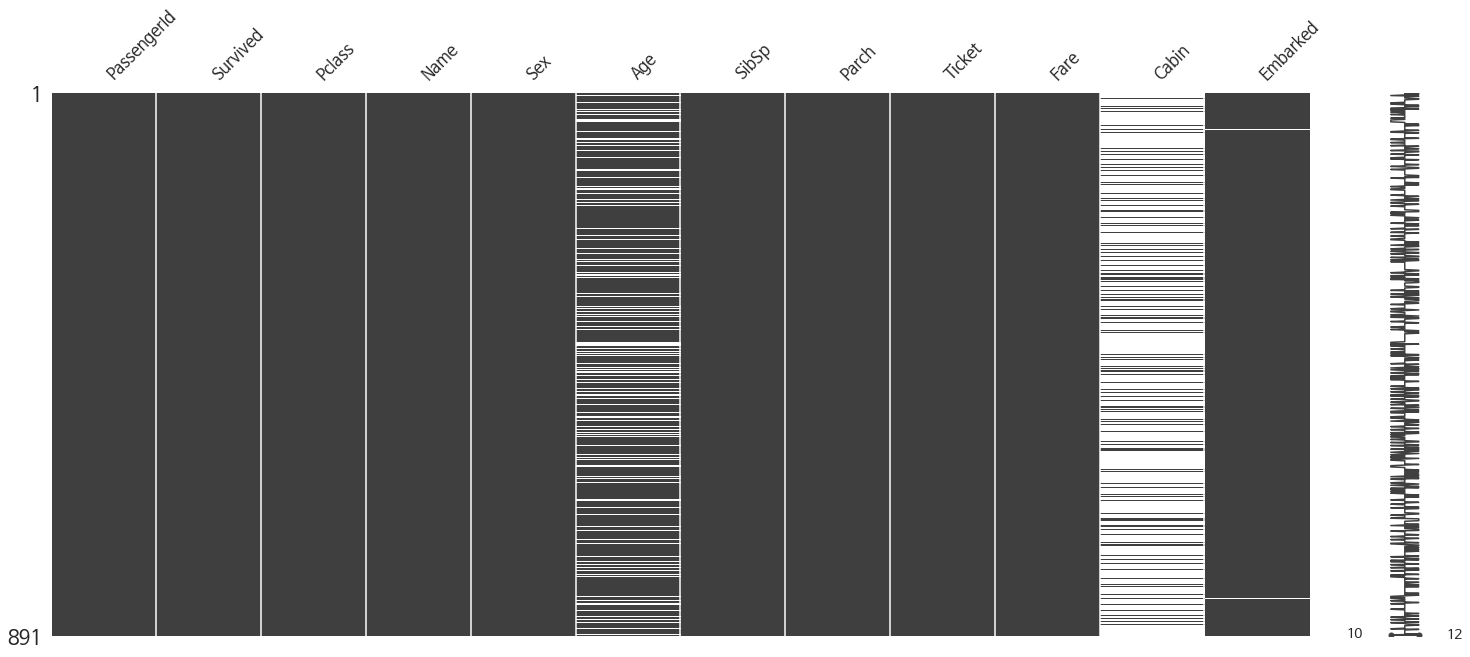

In [18]:
# 결측치 시각화
msno.matrix(df);

## 나) 결측값 삭제
- 70% 이상의 임계치를 정하고 결측치가 존재하는 행/열을 삭제
- 데이터 손실이 발생하므로 선호되지 않음

In [19]:
# 결측값이 하나라도 있는 행 삭제
df_notna = df.dropna(axis=0, how='any', inplace=False)

## 다) 결측값 대체
- 숫자형 : median 값으로 대체(mean은 이상치에 민감)
- 범주형 : 최빈값 또는 'Other'로 대체

### (1) pandas fillna, interpolate 이용

In [20]:
# 지정 값으로 치환
df.eval('Age_fillna = Age', inplace=True)
df['Age_fillna'].fillna(df.Age.median(), inplace=True)

# 앞 행 값으로 치환
df.eval('Age_ffill = Age', inplace=True)
df['Age_ffill'].fillna(method='ffill', inplace=True)

# 뒤쪽 행 값으로 치환
df.eval('Age_bbill = Age', inplace=True)
df['Age_bbill'].fillna(method='bfill', inplace=True)

# 앞/뒤 평균 값으로 치환
df.eval('Age_interpolate = Age', inplace=True)
df['Age_interpolate'].interpolate(inplace=True)

df[['Age', 'Age_fillna', 'Age_ffill', 'Age_bbill', 'Age_interpolate']].head(20)

,Age,Age_fillna,Age_ffill,Age_bbill,Age_interpolate
0,22.0,22.0,22.0,22.0,22.0
1,38.0,38.0,38.0,38.0,38.0
2,26.0,26.0,26.0,26.0,26.0
3,35.0,35.0,35.0,35.0,35.0
4,35.0,35.0,35.0,35.0,35.0
5,NaN,28.0,35.0,54.0,44.5
6,54.0,54.0,54.0,54.0,54.0
7,2.0,2.0,2.0,2.0,2.0
8,27.0,27.0,27.0,27.0,27.0
9,14.0,14.0,14.0,14.0,14.0


### (2) SimpltImputer 이용

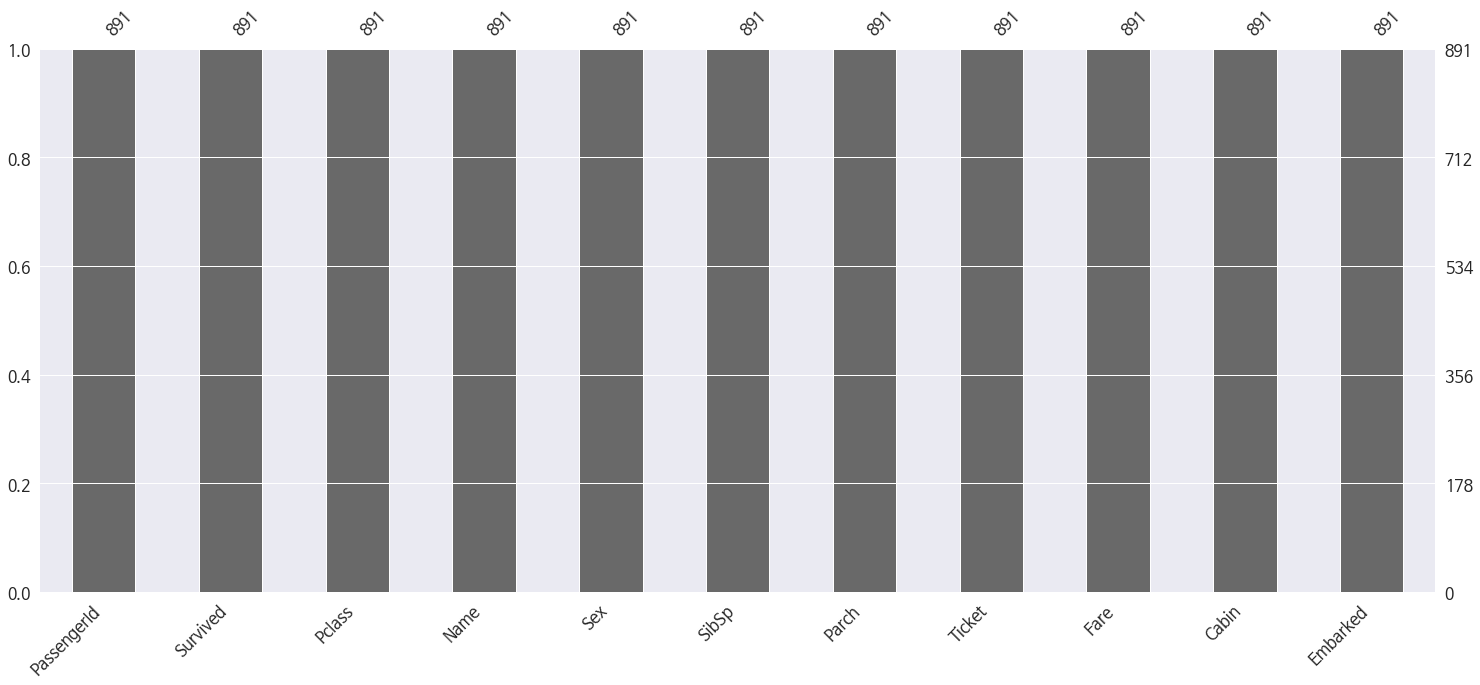

In [21]:
# 숫자형 변수 medaian으로 대체
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# 범주형 변수 최빈값 대체
df['Cabin'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Cabin']])
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])

# 결측치 시각화
df.drop(columns=['Age', 'Age_fillna', 'Age_ffill', 'Age_bbill', 'Age_interpolate'], inplace=True)
msno.bar(df);

# 4) 이상값 처리

## 가) 이상값 확인

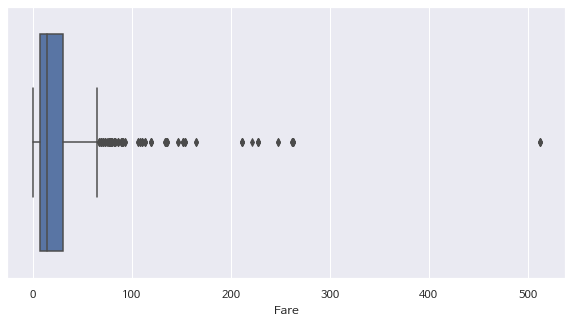

In [22]:
# 이상값 시각화
plt.figure(figsize=(10,5))
sns.boxplot(
    data = df,
    x = 'Fare'
);

## 나) 이상값 처리
- 숫자형 변수 : 상한값으로 대체하거나 Lot Transform

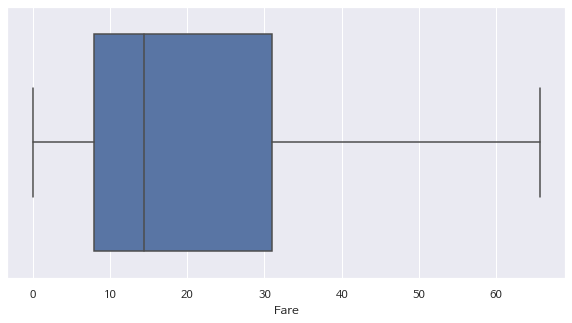

In [23]:
# ESD 계산
q1, q3 = df['Fare'].quantile([.25, .75])
LL, UL = q1-(q3-q1)*1.5, q3+(q3-q1)*1.5

# 이상값을 상한으로 대체
df.Fare = np.where(df.Fare > UL, UL, df.Fare)

# 이상값 시각화
plt.figure(figsize=(10,5))
sns.boxplot(
    data = df,
    x = 'Fare'
);

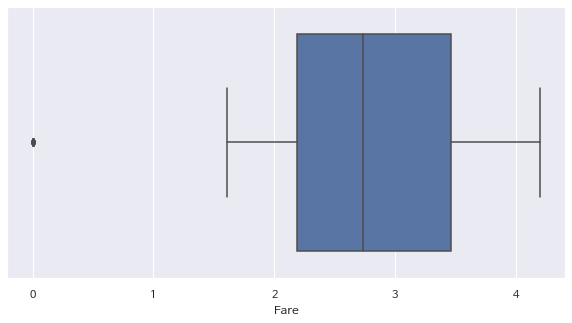

In [24]:
# Log Transform
if df['Fare'].min() > 0:
    df['Fare'] = (df['Fare']+1).transform(np.log)
else:
    df['Fare'] = (df['Fare']-df['Fare'].min()+1).transform(np.log)

# 이상값 시각화
plt.figure(figsize=(10,5))
sns.boxplot(
    data = df,
    x = 'Fare'
);

## 다) 범주형 변수

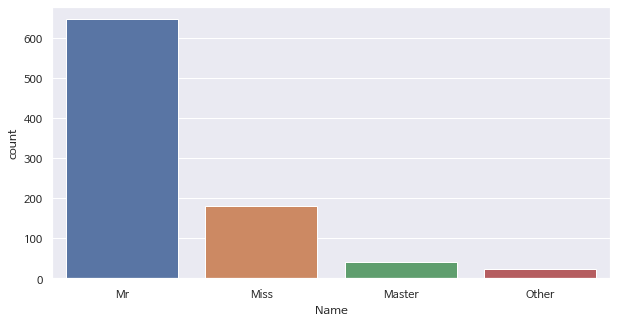

In [25]:
# binning
condlist = [
    df['Name'].str.contains('Mr.'),
    df['Name'].str.contains('Miss.'),
    df['Name'].str.contains('Mrs.'),
    df['Name'].str.contains('Master.')
    ]

choicelist = ['Mr', 'Miss', 'Mrs', 'Master']

df['Name'] = np.select(
    condlist = condlist, 
    choicelist = choicelist, 
    default = 'Other')

# 변환 결과 확인
sns.countplot(
    data = df,
    x = 'Name'
);

# 5) Feature Engineering

## 가) 표준화 및 정규화
- MinMaxScaler : 최소 최대값을 기준으로 0~1로 정규화
  - 모든 이상값의 존재에 대해 매우 민감
- StandardScaler : 평균 0, 분산 1로 표준화
  - 이상치가 존재하면 평균이 치우쳐 있으므로 변수의 균형을 보장하지 못함
- RobustScaler : 중위수와 사분위수를 이용해 스케일링
  - 소수의 이상치에 영향을 받지 않으나 MinMaxScaler, StandardScler 보다 값의 범위가 넓다
  - 이상치 자체는 변환된 데이터에 여전히 존재
- QuantileTransformer : 확률밀도함수가 균일하거나 가우시안 분포가 되도록 0~1 범위로 비선형 변환
  - RobustScaler와 달리 이상치가 유지되지 않고 0~1범위 분포에 매핑되어 축소
  - 파라미터 지정을 통해 균일 또는 가우시안분로를 설정 가능
  - 균일(output_distribution='uniform'), 가우시안 분포(output_distribution='normal')
- PowerTransformer : 가우시안 분포가 되도록 제로 평균 분산 정규화 적용해 데이터를 변환
  - 데이터에 양수만 있는 경우 : method = 'box-cox'
  - 데이터에 음수가 포함된 경우 : method = 'yeo-johnson'

In [26]:
df = pd.DataFrame(data=[1, 2, 3, 4, 3, 4, 5, 1000], columns=['x'])

df['MinMaxScaler'] = MinMaxScaler().fit_transform(df[['x']])
df['StandardScaler'] = StandardScaler().fit_transform(df[['x']])
df['RobustScaler'] = RobustScaler().fit_transform(df[['x']])
df['QuantileTrans_uniform'] = QuantileTransformer(output_distribution="uniform").fit_transform(df[['x']])
df['QuantileTrans_normal'] = QuantileTransformer(output_distribution="normal").fit_transform(df[['x']])
df['PowerTransformer_yeo'] = PowerTransformer(method="yeo-johnson").fit_transform(df[['x']])
df['PowerTransformer_box'] = PowerTransformer(method="box-cox").fit_transform(df[['x']])

df

,x,MinMaxScaler,StandardScaler,RobustScaler,QuantileTrans_uniform,QuantileTrans_normal,PowerTransformer_yeo,PowerTransformer_box
0,1,0.000000,-0.384462,-1.666667,0.000000,-5.199338,-1.669182,-1.809227
1,2,0.001001,-0.381429,-1.000000,0.142857,-1.067571,-0.721468,-0.649935
2,3,0.002002,-0.378395,-0.333333,0.357143,-0.366106,-0.195337,-0.136714
3,4,0.003003,-0.375362,0.333333,0.642857,0.366106,0.145455,0.169091
4,3,0.002002,-0.378395,-0.333333,0.357143,-0.366106,-0.195337,-0.136714
5,4,0.003003,-0.375362,0.333333,0.642857,0.366106,0.145455,0.169091
6,5,0.004004,-0.372329,1.000000,0.857143,1.067571,0.386834,0.377716
7,1000,1.000000,2.645735,664.333333,1.000000,5.199338,2.103579,2.016692


## 나) 더미 변수화
- Full Rank : 특정 변수에 존재하는 모든 범주값으로 더미변수를 만든다.
- Reduced Rank : 특정 변수에 존재하는 기준값은 항상 1로 두고, 나머지를 더미변수로 만든다.
  - Reduced Rank가 필요한 이유는 변수간에 독립성을 보장하기 위해서임
  - 변수값이 A, B인 경우 Full Rank로 더미변수를 생성하면 A, B 두개의 컬럼이 생성되는데 B값이 결정되면 A값이 확정되므로 2개의 더미변수를 모두 사용하면 다중공선성이 발생함

### (1) Full Rank 더미 변수화

In [27]:
import pandas as pd
import numpy as np
from patsy import demo_data, dmatrix

df = pd.DataFrame(data=[['a', 'c'], ['b', 'e'], ['a', 'c'], ['b', np.NAN], ['a', 'd'], ['b', 'e']], columns=['x1', 'x2'])

In [28]:
# Pandas get_dummies 이용
pd.get_dummies(
    data = df['x2'], 
    prefix = 'x2', 
    dummy_na = False, 
    drop_first = False)

,x2_c,x2_d,x2_e
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,0
4,0,1,0
5,0,0,1


In [29]:
# pasty dmatrix 이용
dmatrix('x2+0', df, return_type='dataframe')

,x2[c],x2[d],x2[e]
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0


### (2) Reduced Rank 더미 변수화

In [30]:
# 축소 Rank 방식
pd.get_dummies(
    data = df['x2'], 
    prefix = 'x2', 
    dummy_na = False, 
    drop_first = True) # True로 설정하여 1개 컬럼을 삭제

,x2_d,x2_e
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
5,0,1


In [31]:
# 축소 Rank 방식
dmatrix('x2', df, return_type='dataframe') # '+0'을 포함하지 않으면 됨

,Intercept,x2[T.d],x2[T.e]
0,1.0,0.0,0.0
1,1.0,0.0,1.0
2,1.0,0.0,0.0
4,1.0,1.0,0.0
5,1.0,0.0,1.0


### (3) 두개 이상 범주형 변수 포함
- 통합 축소형 또는 상호작용 방식으로 더미변수화

In [32]:
# 통합 축소형 - Pandas get_dummies 이용
pd.get_dummies(
    data = df, 
    dummy_na = False, 
    drop_first = True)

,x1_b,x2_d,x2_e
0,0,0,0
1,1,0,1
2,0,0,0
3,1,0,0
4,0,1,0
5,1,0,1


In [33]:
# 통합 축소형 - patsy dmatrix 이용
dmatrix('x1+x2', df, return_type='dataframe')

,Intercept,x1[T.b],x2[T.d],x2[T.e]
0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0
5,1.0,1.0,0.0,1.0


In [34]:
# 상호 작용형
dmatrix('x1:x2', df, return_type='dataframe')

,Intercept,x2[T.d],x2[T.e],x1[T.b]:x2[c],x1[T.b]:x2[d],x1[T.b]:x2[e]
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0


## 다) 변수 변환
- 범주형 컬럼 그룹핑
- 날자형 컬럼 그룹핑
- 날짜형 데이터 변환 - 년, 월, 일 분리

## 라) 차원 축소

| 주성분분석 | 요인분석 |
| --- | --- |
| 관찰기술(요인분석 유형) | 모델링 기술 |
| 최대 분산양 설명 | 데이터의 공분산을 설명 |
| 관측된 변수의 선형 조합 | 미관측 변수/요인 선형조합 |
| 구성요소 해석 불가 | 레이블링 및 해석 가능 |
| 차원 축소법 | 잠재변수 방법 |

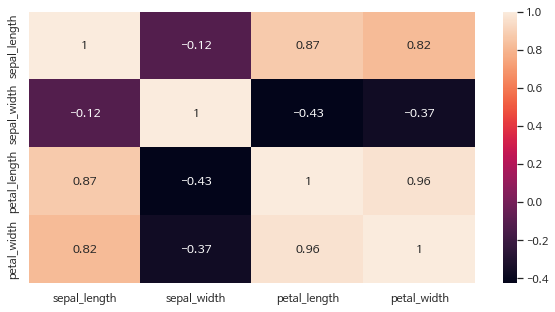

In [35]:
# 연속형 변수간 상관관계 분석
df = sns.load_dataset('iris').iloc[:,:-1]
sns.heatmap(
    data = df.corr(),
    annot = True);

### (1) 주성분분석
- 주성분-변수 관계 : pca.components_.T
- 주성분 설명력 : pca.explained_variance_ratio_

In [36]:
# 최대 갯수로 PCA 실행
ncomp = min(df.shape[0], df.shape[1])
pca = PCA(n_components = ncomp)
pca.fit(df)

# Loadings : 각 변수와 주성분간의 관계
loadings = pd.DataFrame(
    data=pca.components_.T, 
    index=df.columns,
    columns=[ 'pca_'+ str(i+1) for i in range(df.shape[1]) ]
    )

# Cumulative Explained Value : 주성분의 설명력
cev = np.cumsum(pca.explained_variance_ratio_)
cev

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

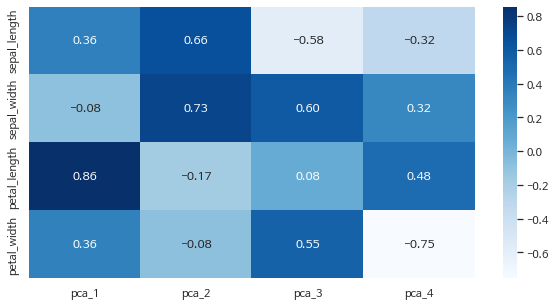

In [37]:
sns.heatmap(
    data = loadings,
    annot=True,
    fmt='.2f',
    cmap='Blues'
);

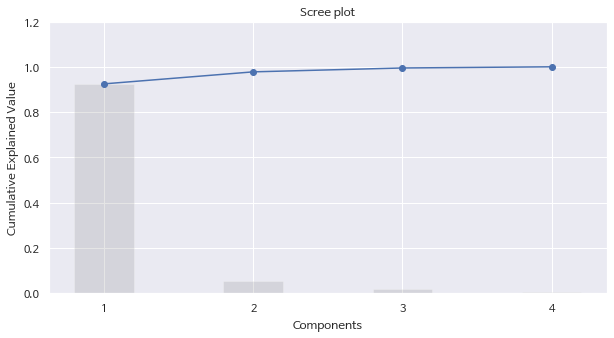

In [38]:
x = range(1, ncomp+1)
y = pca.explained_variance_ratio_ 
s = cev

plt.title('Scree plot'.format(ncomp))
plt.ylim(0,1.2)
plt.xticks(x)
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Value')

plt.bar(x, y, color='grey', width=0.4, alpha=0.2)
plt.plot(x, s, 'bo-')

plt.show()

In [39]:
# 주성분 갯수를 결정하고 최종 주성분 분석을 수행 후 결과 저장
pca = PCA(n_components = 2)
pca_comp = pca.fit_transform(df)

### (2) 요인분석

#### (가) 요인분석 적성성 평가
- bartlett: 관측 변수들의 상호 연관성 확인
- kmo : 관측 변수와 전체 모형의 적합성 결정(0~1 사이)
  - 0.6 미만이면 부적절, 0.8 이상이면 우수

In [40]:
# Bartlett 검정
stat, pvalue = calculate_bartlett_sphericity(df)
print('H0 : 상관행렬이 항등행렬(변수간 관련이 없음) : {}'.format(pvalue > 0.05))

H0 : 상관행렬이 항등행렬(변수간 관련이 없음) : False


In [41]:
# Kaiser-Meyer-Olkin 검정
kmo_all, kmo_model = calculate_kmo(df)
print('H0 : 변수간 편상관 강도 : {}'.format(kmo_model))

H0 : 변수간 편상관 강도 : 0.5367519348790607


#### (나) 요인분석 실행

In [42]:
from scipy.sparse.linalg import eigen
# 최대 갯수로 PCA 실행
ncomp = min(df.shape[0], df.shape[1])
fa = FactorAnalyzer(n_factors=ncomp, rotation='varimax')
fa.fit(df)

# Loadings : 각 변수와 요인간의 관계
loadings = pd.DataFrame(
    data=fa.loadings_, 
    index=df.columns,
    columns=[ 'fa_'+ str(i+1) for i in range(ncomp) ]
    )

# Cumulative Eigen Value : 요인들의 설명력
ev, v = fa.get_eigenvalues()
cev = np.cumsum(ev)
cev

array([2.91849782, 3.83252829, 3.97928516, 4.        ])

In [43]:
loadings

,fa_1,fa_2,fa_3,fa_4
sepal_length,0.995957,-0.009327,0.035266,0.0
sepal_width,-0.108139,0.755990,-0.079890,0.0
petal_length,0.861249,-0.413169,0.287304,0.0
petal_width,0.800788,-0.317525,0.494231,0.0


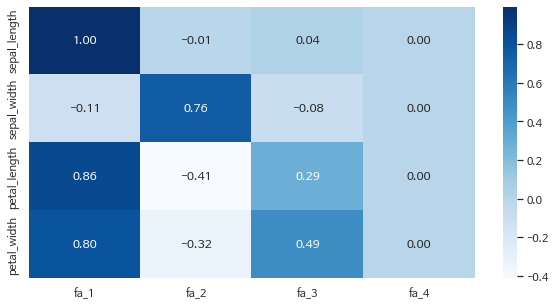

In [44]:
sns.heatmap(
    data = loadings,
    annot=True,
    fmt='.2f',
    cmap='Blues'
);

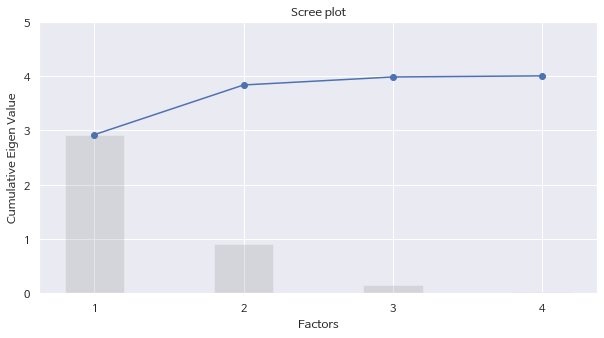

In [45]:
x = range(1, ncomp+1)
y = ev
s = cev

plt.title('Scree plot'.format(ncomp))
plt.ylim(0, ncomp+1)
plt.xticks(x)
plt.xlabel('Factors')
plt.ylabel('Cumulative Eigen Value')

plt.bar(x, y, color='grey', width=0.4, alpha=0.2)
plt.plot(x, s, 'bo-')

plt.show()

In [46]:
# 요인의 갯수를 결정하고
ncomp = 3
fa = FactorAnalyzer(n_factors=ncomp, rotation='varimax')
fa_comp = fa.fit_transform(df)

loadings = pd.DataFrame(
    data=fa.loadings_, 
    index=df.columns,
    columns=[ 'fa_'+ str(i+1) for i in range(ncomp) ]
    )

### (다) 요인분석 결과 검증
- 크론바흐 알파: 주어진 변수들이 한개 그룹에 속할 수 있는지 내적일관성 측정, 0.7 이상이면 우수

In [47]:
loadings

,fa_1,fa_2,fa_3
sepal_length,0.995957,-0.009327,0.035266
sepal_width,-0.108139,0.755990,-0.079890
petal_length,0.861249,-0.413169,0.287304
petal_width,0.800788,-0.317525,0.494231


In [48]:
# 요인별로 크론바흐 알파값을 계산
for c in loadings.columns:
    idx = loadings[c].loc[np.abs(loadings[c]) >= 0.3].index

    # 적어도 변수가 2개 이상이어야 크론바흐 알파 값 계산 가능
    if len(idx) >= 2:
        factor_alpha, conf_interval = pg.cronbach_alpha(df[idx])
        print(f'{c} : {factor_alpha}')

fa_1 : 0.8771447836441384
fa_2 : 0.4542665948543568
